In [1]:
%load_ext autoreload
%autoreload 2
from chronos import Chronos

chr = Chronos(delta_min=20, cc1=0, cc2=75, buffer=3000, nodata=10, 
            alpha = 0.1, show_aoi=False, shadow=True, registration=True,
            pansharpening=True, sharpening=True, force_reproject=False, 
            normalization=None, verbose=2, n_jobs=8, prefer='threads')

/Users/arthurcalvi/Venv/Download/lib/python3.9/site-packages/rasterio/path.py:15: RasterioDeprecationWarning: rasterio.path will be removed in version 1.4.
  warnings.warn(


In [ ]:
folder = '/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_transfo-pan'
chr.get_registration(folder, keep_only_common=False, remove_old=False)



# Test pipeline



In [5]:
import geopandas as gpd
import pandas as pd
from datetime import datetime
import os 

directory = '/Users/arthurcalvi/Data/results/disturbances/matching_france_v04_EPSG3857.parquet'
gdf = gpd.read_parquet(directory)

In [6]:
t_gdf = gdf[ gdf.overlap_DFDE_FI == True ].drop_duplicates(subset=['index_SS', 'year'])
t_gdf['area'] = t_gdf.geometry.area
t_gdf = t_gdf[(t_gdf.year > 2015)]
t_gdf_area = t_gdf.sort_values('area', ascending=False).iloc[:10]
t_gdf_prob = t_gdf.sort_values('probability', ascending=False).iloc[:10]
t_gdf = gpd.GeoDataFrame(pd.concat([t_gdf_area, t_gdf_prob]), crs=t_gdf.crs)
table = t_gdf.sort_values('probability', ascending=False)
table

,index_SS,year,geometry,class_SS,index_DFDE,start_date_DFDE,end_date_DFDE,name,class_DFDE,index_FI,class_FI,start_date_FI,end_date_FI,sjoin_distance,overlap_DFDE_FI,area_DFDE,class,probability,area
16740568,5693533,2016,"POLYGON ((390182.593 6193984.736, 390186.479 6...",Storm,299.0,2013-01-01,2013-12-28,Île-de-France,"Storm,Biotic",128241.0,Storm,2013-12-27 18:00:00,2018-12-28,4199.462543,True,31971.101507,Storm,0.213838,20498.564331
16739138,5692471,2016,"POLYGON ((198151.562 6229877.192, 198156.509 6...",Storm,299.0,2013-01-01,2013-12-28,Île-de-France,"Storm,Biotic",79606.0,Storm,2013-12-27 18:00:00,2018-12-28,3820.443331,True,31971.101507,Storm,0.213838,2067.120126
16740648,5693546,2016,"POLYGON ((356133.519 6288406.696, 356137.658 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,108400.0,Biotic-dieback,2016-12-27 18:00:00,2021-12-28,5051.479915,True,31971.101507,Storm,0.176440,10478.589327
16772872,5722317,2019,"POLYGON ((316738.735 6224764.791, 316747.343 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,144337.0,Tree-logging,2016-12-27 18:00:00,2021-12-28,7986.833857,True,31971.101507,Storm,0.176440,132134.416530
16751272,5702967,2017,"POLYGON ((356116.934 6287576.877, 356121.073 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,108400.0,Biotic-dieback,2016-12-27 18:00:00,2021-12-28,4866.521376,True,31971.101507,Storm,0.176440,8381.425424
16750642,5702611,2017,"POLYGON ((294189.871 6167644.943, 294194.251 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,116026.0,Biotic-dieback,2016-12-27 18:00:00,2021-12-28,7358.766042,True,31971.101507,Storm,0.176440,2037.281356
16740642,5693544,2016,"POLYGON ((357593.812 6282929.914, 357548.299 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,108400.0,Biotic-dieback,2016-12-27 18:00:00,2021-12-28,4757.523361,True,31971.101507,Storm,0.176440,58605.765931
16762141,5712301,2018,"POLYGON ((299155.198 6172047.422, 299200.093 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,116026.0,Biotic-dieback,2016-12-27 18:00:00,2021-12-28,3727.448634,True,31971.101507,Storm,0.176440,2039.374487
16762509,5712548,2018,"POLYGON ((369801.390 6267466.855, 369846.825 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,143305.0,Tree-logging,2016-12-27 18:00:00,2021-12-28,2810.739578,True,31971.101507,Storm,0.176440,10427.195352
16740618,5693540,2016,"POLYGON ((374522.239 6260692.699, 374526.257 6...",Storm,304.0,2016-01-01,2016-12-28,Île-de-France,Biotic,143305.0,Tree-logging,2016-12-27 18:00:00,2021-12-28,5316.924132,True,31971.101507,Storm,0.176440,10410.566432


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['sentinel-2', 'landsat-8']


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of  11 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  11 out of  11 | elapsed:    2.3s finished


Items found for research 1 with cc=0 : 11


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   32.2s
[Parallel(n_jobs=8)]: Done 359 out of 359 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Items found for research 2 with cc=25 (on aoi) : 378


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:   31.9s finished


Items found for combined research:  191
upper bound :  170.0


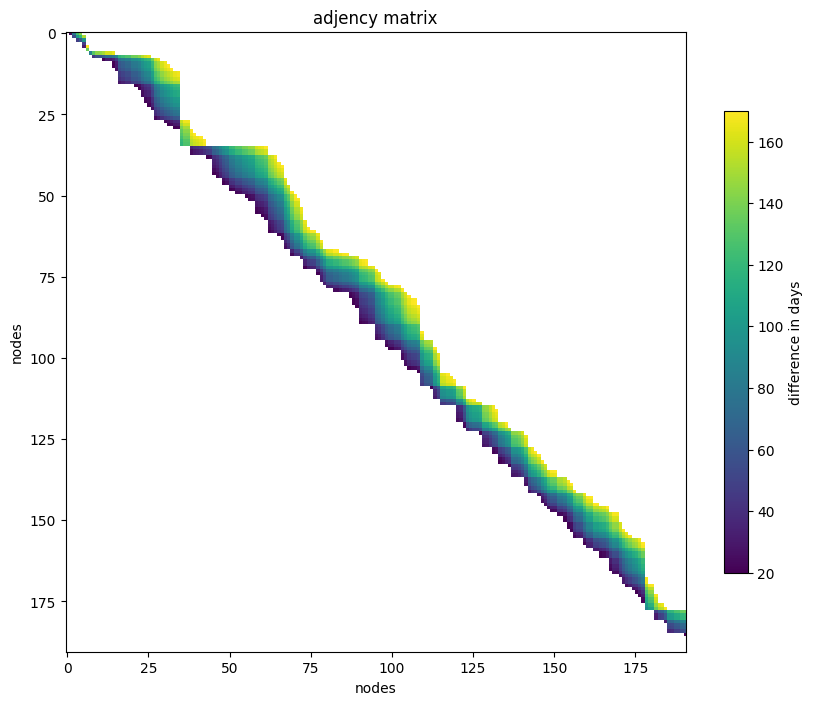

is strongly connected :  False
is weakly connected :  True
Avg Score: 0.42, Avg Cloud cover: 0.29, Avg Spatial res: 11.00, Avg nodata: 0.00, Avg Weight: 11.29, Std Dev Weight: 21.35
Avg Score: 0.42, Avg Cloud cover: 0.29, Avg Spatial res: 11.00, Avg nodata: 0.00, Avg Weight: 11.47, Std Dev Weight: 21.43


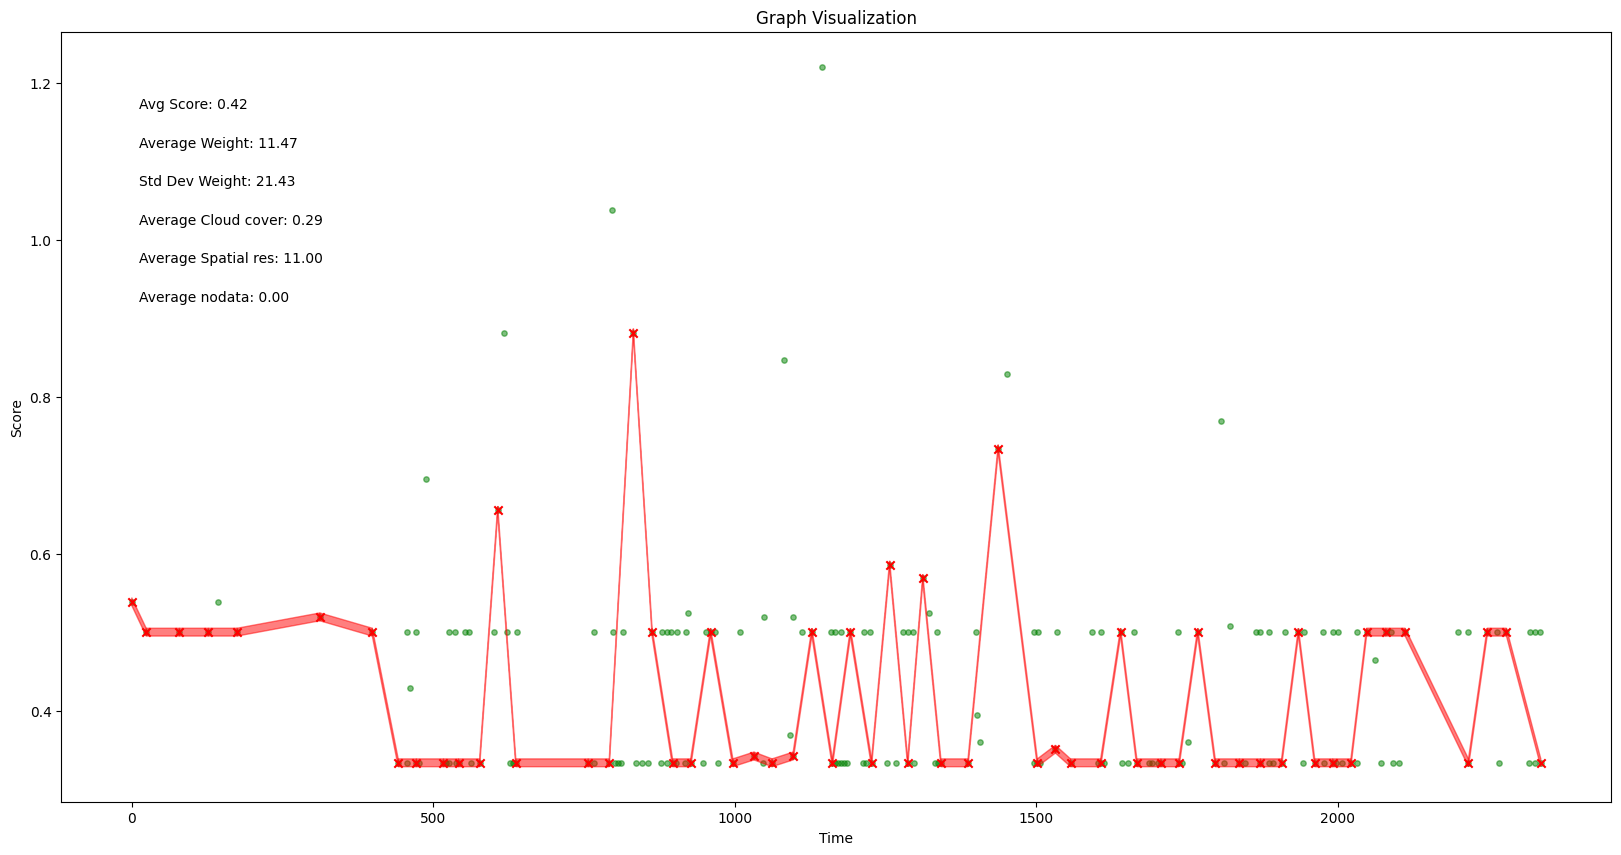

target: {'sat': 'sentinel-2', 'band': 'B02', 'res': 10, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 489550.0,
       0.0, -10.0, 5372050.0), 'shape': (453, 479)}
Starting download at:  /Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.2min


Starting registration...
inputs: /Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/rgb/2019-09-06_104046_L8_RGB.tif
outputs: /Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/rgb_r/2019-09-06_104046_L8_RGB.tif
extra_outputs:
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/evi_r/2018-04-06_105029_S2B_EVI.tif
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/nbr_r/2019-05-01_105039_S2B_NBR.tif
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/crswir_r/2021-04-25_105021_S2A_CRSWIR.tif
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/ndvi_r/2019-11-17_105229_S2B_NDVI.tif
extra_inputs:
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/evi/2018-04-06_105029_S2B_EVI.tif
/Users/arthurcalvi/Data/disturbances-ex/france/disturbance1_test-pipeline/nbr/2019-05-01_105039_S2B_NBR.tif
/Users/arthurcalvi/Data/disturbances-ex/france/di

[Parallel(n_jobs=8)]: Done  59 out of  59 | elapsed:  2.7min finished


  0%|          | 0/59 [00:00<?, ?it/s]

computing FFTs... 


  0%|          | 0/59 [00:00<?, ?it/s]

computing shifts... 


  0%|          | 0/1711 [00:00<?, ?it/s]

registration accuracy: 0.15 px
resampling images... 


  0%|          | 0/59 [00:00<?, ?it/s]

reading images... 


  0%|          | 0/59 [00:00<?, ?it/s]

resampling images... 


  0%|          | 0/59 [00:00<?, ?it/s]

reading images... 


  0%|          | 0/59 [00:00<?, ?it/s]

resampling images... 


  0%|          | 0/59 [00:00<?, ?it/s]

reading images... 


  0%|          | 0/59 [00:00<?, ?it/s]

resampling images... 


  0%|          | 0/59 [00:00<?, ?it/s]

reading images... 


  0%|          | 0/59 [00:00<?, ?it/s]

resampling images... 


  0%|          | 0/59 [00:00<?, ?it/s]

files to remove:  set()
files to remove:  set()
files to remove:  set()
files to remove:  set()


In [9]:
%load_ext autoreload
%autoreload 2
from chronos import Chronos

from datetime import datetime, timedelta, timezone
delta = timedelta(days=3*365)
row = table.iloc[12]
start_date = datetime(row.year, 1, 1, 10, 10, 10, tzinfo=timezone.utc) - delta
end_date = datetime(row.year, 12, 31, 10, 10, 10, tzinfo=timezone.utc) + delta
chr = Chronos(delta_min=20, cc1=0, cc2=75, buffer=3000, nodata=10, 
            alpha = 0.1, show_aoi=False, shadow=True, registration=True,
            pansharpening=True, sharpening=True, force_reproject=False, 
            normalization=None, verbose=2, n_jobs=8, prefer='threads')

dir_ = '/Users/arthurcalvi/Data/disturbances-ex/france'
name_folder = 'disturbance1_test-pipeline'
folder = os.path.join(dir_, name_folder)
results = chr.dl_pipeline(row.geometry, start_date, end_date, folder, \
                           indices=['rgb', 'ndvi', 'evi', 'crswir', 'nbr', 'qa', 'cloud_mask'], \
                            remove_old=True, keep_only_common=True)